In [1]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from operator import itemgetter, attrgetter

In [2]:
def ki(exp,the):
    ki_2=0
    
    #print(exp_the[0], "\n\n")
    
    
    for i in range(0, len(exp)):
        ki_2=ki_2+(exp[i]-the[i])**2
    
    #print(len(exp_the)) 
    return np.sqrt(ki_2/(len(exp)))

In [3]:
def nuc_error(exp, the):
    err=abs(exp-the)/exp
    return err 


In [4]:
#importing from experimental file
# Num Nuc  A   N   Z        E        E/A     dE     Eval    S1n     dS1n  Eval    
# 0   1    2   3   4        5        6       7      8       9       10    11

#S1p     dS1p  Eval    S2n     dS2n  Eval    S2p     dS2p  Eval
#12      13    14      15      16    17      18      19    20

N_exp  = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3, skip_header=350, skip_footer=(3433-3046)) #Number of neutrons
Z_exp  = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4, skip_header=350, skip_footer=(3433-3046)) #Number of protons
X_exp  = np.transpose(np.stack((Z_exp,N_exp)))
A_exp  = N_exp+Z_exp # Total number of Nucleons

# Difference between the experimental binding energy and the Liquid drop model
y_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5, skip_header=350, skip_footer=(3433-3046))
dy_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=7, skip_header=350, skip_footer=(3433-3046))

S_p_exp  = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=12, skip_header=350, skip_footer=(3433-3046))
S_2p_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=18, skip_header=350, skip_footer=(3433-3046))

S_n_exp =-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=9, skip_header=350, skip_footer=(3433-3046))
S_2n_exp=-np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=15, skip_header=350, skip_footer=(3433-3046))

y_exp_d={}
S_n_exp_d={}
S_2n_exp_d={}

for i in range(0,len(N_exp)):
    y_exp_d[Z_exp[i], N_exp[i]]=y_exp[i]
    S_n_exp_d[Z_exp[i], N_exp[i]]=S_n_exp[i]
    S_2n_exp_d[Z_exp[i], N_exp[i]]=S_2n_exp[i]

In [5]:
#SKMS importing relevent data
#Symbol Z  N A Binding_Energy_(MeV)  S_p_(MeV)  S_{2p}_(MeV) S_n_(MeV)  S_{2n}_(MeV) Q_{alpha}_(MeV)       
#0      1  2 3 4                     5          6            7          8            9

Z_SKMS    = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=1, skip_header=347, skip_footer=(8700-5606)) #Number of protons
N_SKMS    = np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=2, skip_header=347, skip_footer=(8700-5606)) #Number of neutrons
A_SKMS    = N_SKMS+Z_SKMS                                      #Total number of Nucleons
y_SKMS    = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=4, skip_header=347, skip_footer=(8700-5606))

S_p_SKMS  = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=5, skip_header=347, skip_footer=(8700-5606))
S_2p_SKMS = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=6, skip_header=347, skip_footer=(8700-5606))

S_n_SKMS  = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=7, skip_header=347, skip_footer=(8700-5606))
S_2n_SKMS = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=8, skip_header=347, skip_footer=(8700-5606))

Q_SKMS    = -np.genfromtxt('SKMS_all_nuclei-new.dat',usecols=9, skip_header=347, skip_footer=(8700-5606))

S_p_SKMS  = np.where(np.isnan(S_p_SKMS), 0, S_p_SKMS)
S_2p_SKMS = np.where(np.isnan(S_2p_SKMS), 0, S_2p_SKMS)

S_n_SKMS  = np.where(np.isnan(S_n_SKMS), 0, S_n_SKMS)
S_2n_SKMS = np.where(np.isnan(S_2n_SKMS), 0, S_2n_SKMS)

Q_SKMS=np.where(np.isnan(Q_SKMS), 0, Q_SKMS)

X_SKMS    = np.transpose(np.stack((Z_SKMS, N_SKMS, A_SKMS, y_SKMS, S_p_SKMS, S_2p_SKMS, S_n_SKMS, S_2n_SKMS, Q_SKMS)))
X_exp     = np.transpose(np.stack((Z_exp,   N_exp,  A_exp,  y_exp)))

y_SKMS_d={}
S_p_SKMS_d={}
S_2p_SKMS_d={}

S_n_SKMS_d={}
S_2n_SKMS_d={}

Q_SKMS_d={}

for i in range(0,len(X_SKMS)):
    y_SKMS_d[Z_SKMS[i], N_SKMS[i]]=y_SKMS[i]
    S_p_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_p_SKMS[i]
    S_2p_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_2p_SKMS[i]
    S_n_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_n_SKMS[i]
    S_2n_SKMS_d[Z_SKMS[i], N_SKMS[i]]=S_2n_SKMS[i]
    Q_SKMS_d[Z_SKMS[i], N_SKMS[i]]=Q_SKMS[i]



In [6]:
y_mat_SKMS=[]
y_mat_SKMS_d={}

y_mat_exp=[]
y_mat_exp_d={}


ZN_mat=[]

for X_exp_i in X_exp:
    try:
        test=y_SKMS_d[X_exp_i[0], X_exp_i[1]]
        
        
        y_mat_SKMS.append(y_SKMS_d[X_exp_i[0], X_exp_i[1]])
        y_mat_SKMS_d[X_exp_i[0], X_exp_i[1]]=y_SKMS_d[X_exp_i[0], X_exp_i[1]]
        
        y_mat_exp.append(y_exp_d[X_exp_i[0], X_exp_i[1]])
        y_mat_exp_d[X_exp_i[0], X_exp_i[1]]=y_exp_d[X_exp_i[0], X_exp_i[1]]
        
        
        ZN_mat.append((X_exp_i[0], X_exp_i[1]))
        
        
    except KeyError:
        continue
        
        
X_mat  =np.transpose(np.stack((np.transpose(ZN_mat)[0], np.transpose(ZN_mat)[1],y_mat_SKMS, y_mat_exp )))


print(np.shape(X_mat))
print(X_mat[0])
print(X_mat[1])

diff=[]
for X_mat_i in X_mat:
    diff.append(X_mat_i[2]-X_mat_i[3])
    
    
X_mat  =np.transpose(np.stack((np.transpose(ZN_mat)[0], np.transpose(ZN_mat)[1],y_mat_SKMS, y_mat_exp,diff )))
print(np.shape(X_mat))
print(X_mat[0])
print(X_mat[1])


(2586, 4)
[ 20.        14.       252.133057 244.917409]
[ 20.        15.       267.741621 262.026409]
(2586, 5)
[ 20.        14.       252.133057 244.917409   7.215648]
[ 20.        15.       267.741621 262.026409   5.715212]


Current size: [6.0, 4.0]


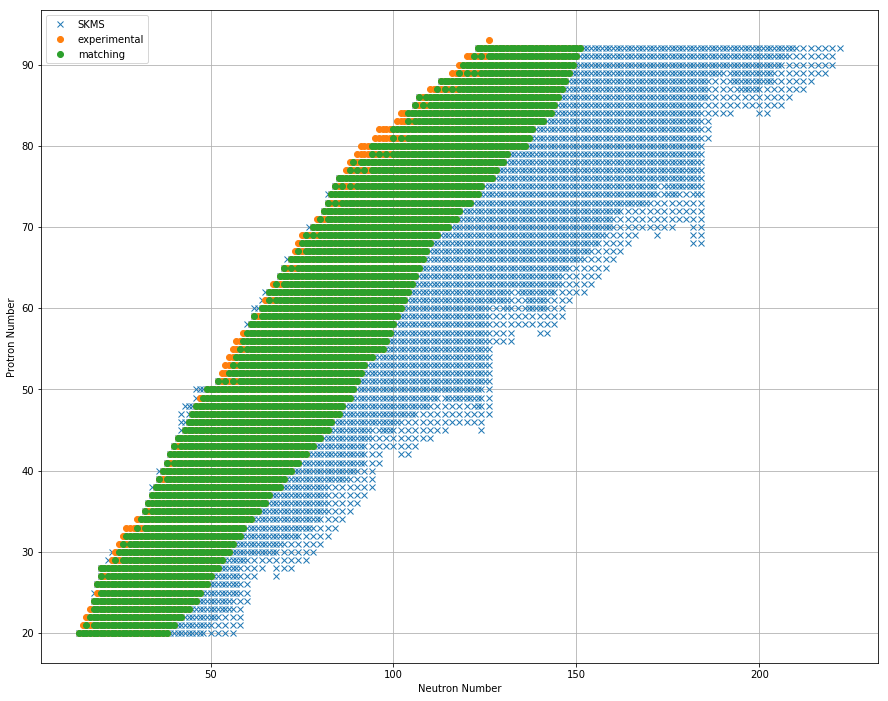

In [7]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

plt.plot(N_SKMS, Z_SKMS,  'x', markersize=6, label='SKMS')
plt.plot(N_exp,  Z_exp, 'o', markersize=6, label='experimental')
plt.plot(np.transpose(ZN_mat)[1],np.transpose(ZN_mat)[0],'o', markersize=6, label='matching')
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
rf=RandomForestRegressor(n_estimators=1000)
X_train, X_test, y_train, y_test = train_test_split(ZN_mat, diff, test_size =0.25, random_state=42 )
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

diff_pred=rf.predict(ZN_mat)

0.9992795982562006
0.9949704268296155


In [14]:
y_w_ml=[]
for i in range(0,len(X_mat)):
    y_w_ml.append(X_mat[i][2]-diff_pred[i])
    
X_mat  =np.transpose(np.stack((np.transpose(ZN_mat)[0], np.transpose(ZN_mat)[1],  y_mat_SKMS,  y_mat_exp,  diff, diff_pred, y_w_ml )))


In [15]:
print(ki(np.transpose(X_mat)[3],np.transpose(X_mat)[6]))
print(ki(np.transpose(X_mat)[3],np.transpose(X_mat)[2]))

0.2454404321111526
6.395698570629776


difference


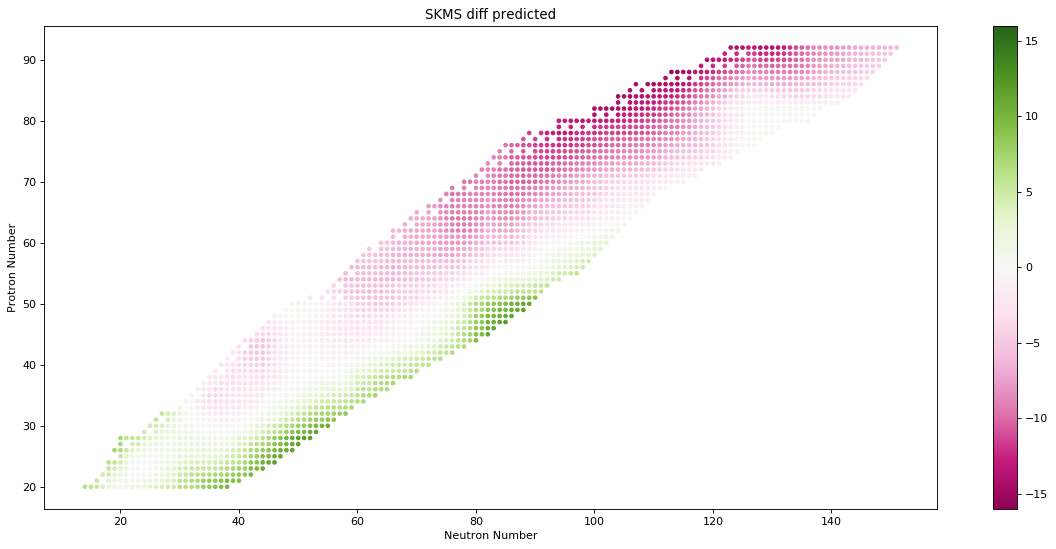

difference


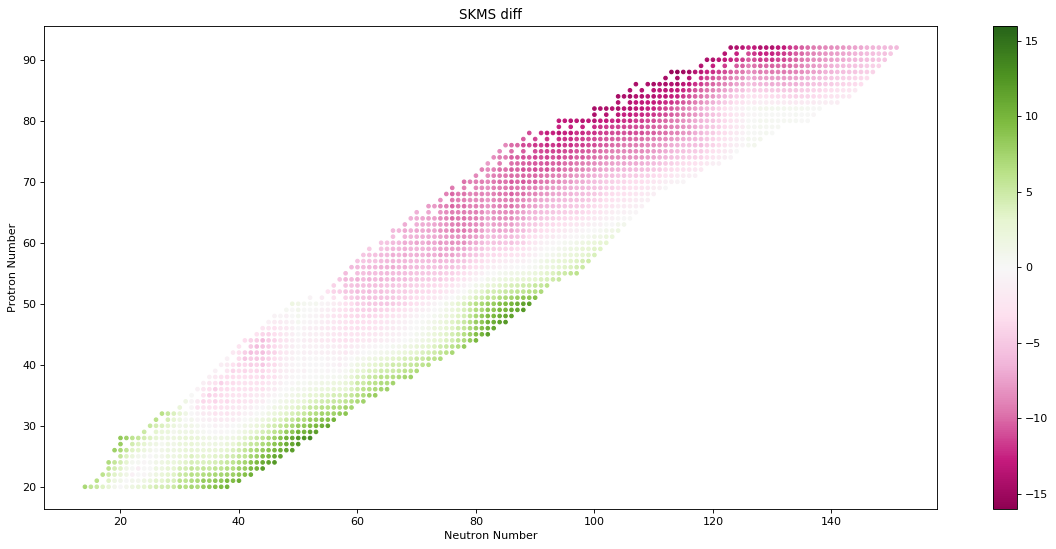

difference


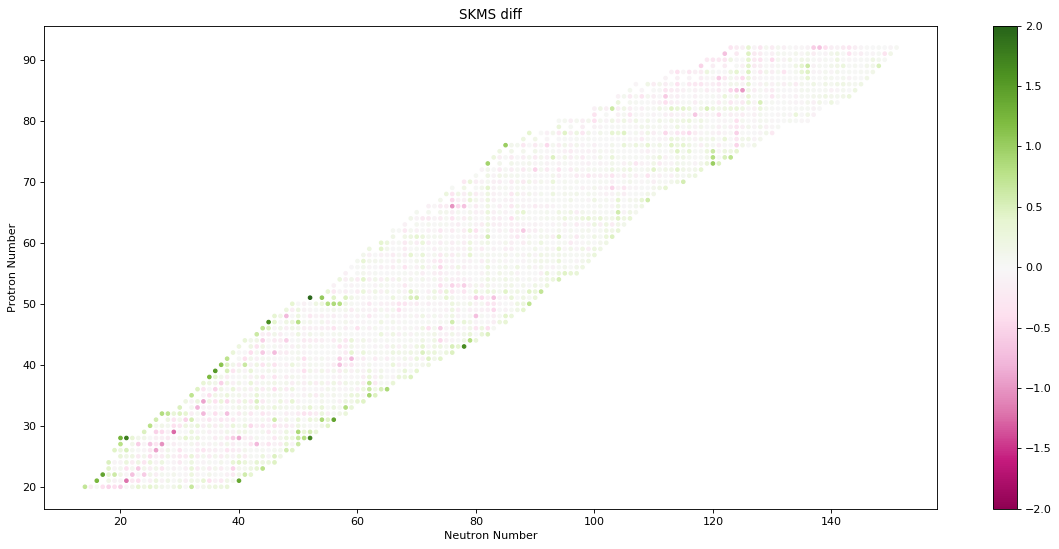

In [11]:
print("difference")
ext = np.int(np.ceil(max(-np.min(diff_pred),np.max(diff_pred))))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(np.transpose(X_mat)[1],np.transpose(X_mat)[0],c=diff_pred,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title("SKMS diff predicted")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()

print("difference")
ext = np.int(np.ceil(max(-np.min(diff),np.max(diff))))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(np.transpose(X_mat)[1],np.transpose(X_mat)[0],c=diff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title("SKMS diff")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


print("difference")
ext = np.int(np.ceil(max(-np.min(diff-diff_pred),np.max(diff-diff_pred))))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(np.transpose(X_mat)[1],np.transpose(X_mat)[0],c=diff-diff_pred,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
plt.colorbar(sc)
plt.title("SKMS diff")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


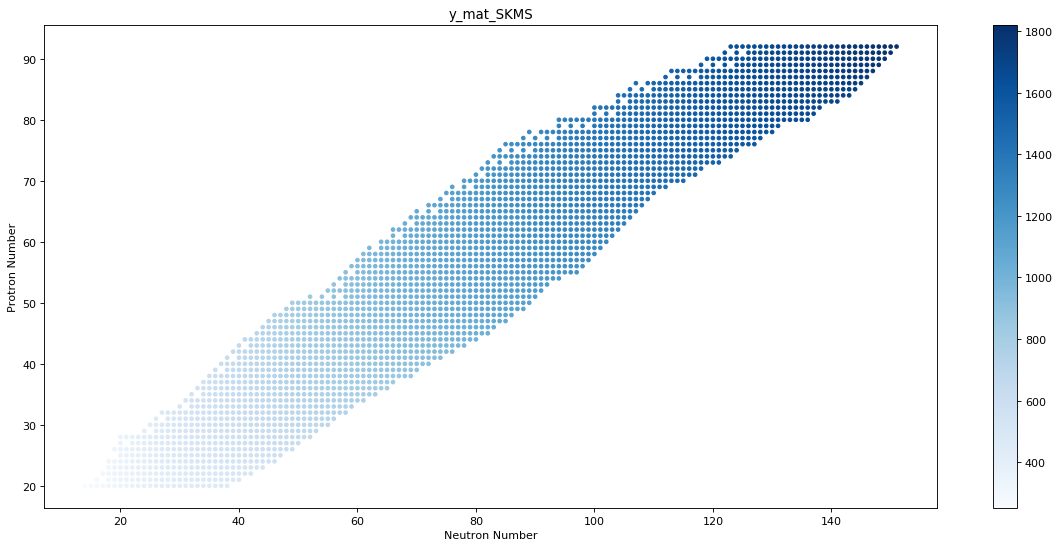

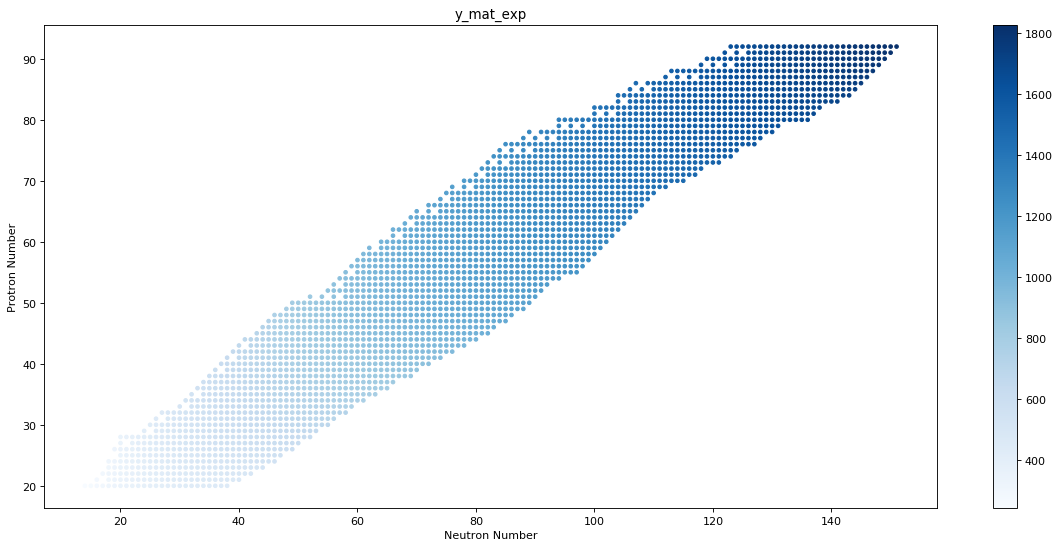

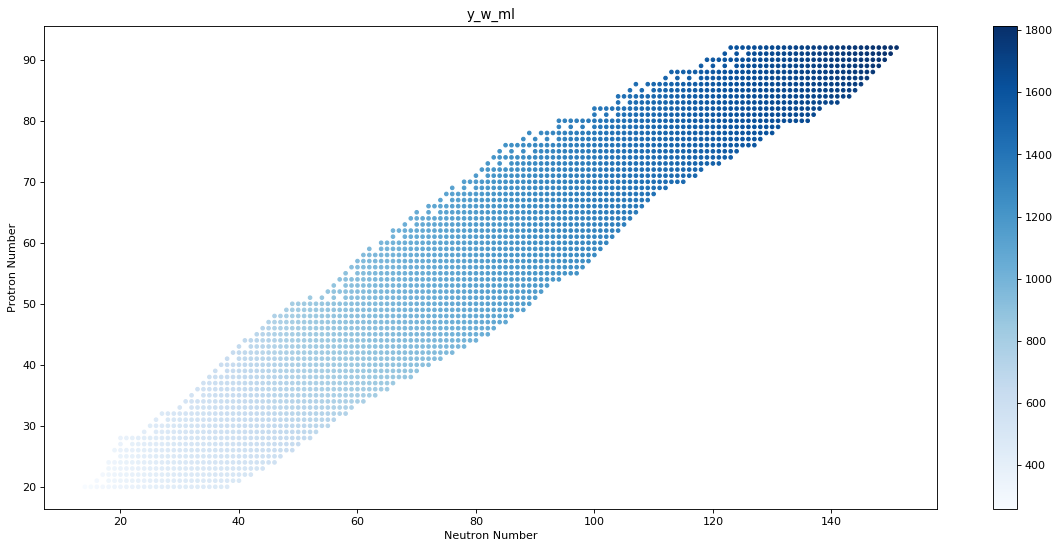

In [12]:
   
ext = np.int(np.ceil(max(y_mat_SKMS)))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(np.transpose(X_mat)[1],np.transpose(X_mat)[0],c=y_mat_SKMS,cmap='Blues',vmax=ext,s=10)
plt.colorbar(sc)
plt.title("y_mat_SKMS")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


ext = np.int(np.ceil(max(y_mat_exp)))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(np.transpose(X_mat)[1],np.transpose(X_mat)[0],c=y_mat_exp,cmap='Blues',vmax=ext,s=10)
plt.colorbar(sc)
plt.title("y_mat_exp")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()


ext = np.int(np.ceil(max(y_w_ml)))
fig = plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc  = plt.scatter(np.transpose(X_mat)[1],np.transpose(X_mat)[0],c=y_w_ml,cmap='Blues',vmax=ext,s=10)
plt.colorbar(sc)
plt.title("y_w_ml")
plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.show()
